# Day 24:30 daily statistics - Correlação Múltiplas e Parciais

$\color{red}{\text{Exemplo 9.2}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino** Uma agência de proeteção ambiental coleta dados de vários tipos de poluentes na atmosfera. Os dados a seguir são quantidades de monóxido de carbono, hidrocarbonetos e óxido de nitrogênio emitidos por carros, durante uma coelta realizada em sete períodos diferentes em um grande centro. Um MRLM é utilizado para se tentar relacionar o óxido de nitrogênio (Y), com o monóxido de carbono $(X_1)$ e o hidrocarboneto $(X_2)$.

| Monóxido de carbono X1 | Hidrocarbonetos X2 | Óxido de nitrogênio Y |
|:----------------------:|:------------------:|:---------------------:|
|          69.7          |         8.7        |          3.8          |
|          67.7          |         8.3        |          3.6          |
|          64.8          |         7.7        |          3.4          |
|          61.5          |         7.2        |          3.1          |
|          58.0          |         6.6        |          2.9          |
|          54.5          |         6.0        |          2.7          |
|          49.4          |         5.3        |          2.6          |

+ a) Determine o valor de $R^2_{Y |X_1,X_2}$
+ b) Estime a correlação parcial de Y e $X_1$, controlada por $X_2$ assim como a correlação de Y e $X_2$, controlada por $X_1$.

$\color{red}{\text{a)}}$ - **Determine o valor de $R^2_{Y |X_1,X_2}$**


Por definição, temos:

$$R^2_{Y|X_1,X_2,X_3,\ldots,X_p}=SQ_{Reg}/SQT$$

Portanto, deveremos determinar o valor de $SQ_{reg}$ e $SQT$.

In [1]:
#Entrada de dados
x1=c(69.7,67.7,64.8,61.5,58,54.5,49.4)
x2=c(8.7,8.3,7.7,7.2,6.6,6,5.3)
y=c(3.8,3.6,3.4,3.1,2.9,2.7,2.6)
dados1=data.frame(y,x2)
dados2=data.frame(x1,x2)



#Segundo Método : R2=SQ_regressao/ SQ_tot
#SQ_regressao = t(beta) . t(X) . y - n . media(y)^2
#SQ_erro= t(y) . y - t(beta) . t(X) . y
#SQ_total = t(y) . y - n . media(y)^2

#Calculado SQ_total
SQ_total = t(y) %*% y - length(y) %*% mean(y)^2

#Criando a matrix X
x=matrix(c(rep(1,7),x1,x2),ncol=3,byrow=F)

#Determinando Beta
beta=solve(t(x)%*%x)%*%t(x)%*%y

#Determinando SQ_regressao
SQ_regressao= t(beta) %*% t(x) %*% y - length(y) %*% mean(y)^2

#Determinando o R^2_{Y|x1,x2}
R2_cal=SQ_regressao/SQ_total
cat("O coeficiente de determinação é",R2_cal,"indicando que há um bom ajuste do modelo.")



O coeficiente de determinação é 0.9878669 indicando que há um bom ajuste do modelo.

$\color{red}{\text{b)}}$ - **Estime a correlação parcial de Y e $X_1$, controlada por $X_2$ assim como a correlação de Y e $X_2$, controlada por $X_1$.**

Para estimarmos inicialmente $\rho_{(Y,X_1|X_2)}$, utilizamos dois procedimentos: ajustamos modelos de regressão de Y em $X_2$ e de $x_1$ em $X_2$, calculando em seguida a correlação observada entre os resíduos dos dois modelos, depois $\rho_{(Y,X_1|X_2)}$ é estimada usando a definição: 

$$\rho_{(Y,X_1|X_2)}=\frac{\rho_{(Y,X_1)}-\rho_{(Y,X_2)}\rho_{(X_1,X_2)}}{\sqrt{(1-\rho^2_{(Y,X_2)})(1-\rho^2_{(X_1,X_2)})}}$$


Os resíduos dos dois modelos é dado a seguir:

In [2]:
#Calculo da correlaçao parcial de Y e X1, controlada por X2
rho_1=(cor(y,x1)-cor(y,x2)*cor(x1,x2))/(sqrt((1-cor(y,x2)^2)*(1-cor(x1,x2)^2)))

#Calculo da correlaçao parcial de Y e X2, controlada por X1
rho_2=(cor(y,x2)-cor(y,x1)*cor(x1,x2))/(sqrt((1-cor(y,x1)^2)*(1-cor(x1,x2)^2)))


#Calculo da correlação parcial de Y e X2, controlada por X1

cat("\n\nA correlação parcial de Y e X1, controlada por X2 é",rho_1, "e a correlação parcial de Y e X2, controlada por X1 é",rho_2,"\n\n")



A correlação parcial de Y e X1, controlada por X2 é -0.7150351 e a correlação parcial de Y e X2, controlada por X1 é 0.8416177 



Como a correlação parcial entre Y e $X2$, controlada por $X_1$, é maior que a de Y e $X_1$, controlada por $X_2$, podemos dizer que a contribuição de $X_2$ no modelo que já contém $X_1$ é maior que a contribuição de $X_1$ no modelo com apenas $X_2$.

$\color{red}{\text{Exemplo 9.4}}$ - **Retirado do livro: Análise de Modelos de Regressão Linear com Aplicações, de Charnet, Freire, Charnet e Bonvino**  Vamos considerar, na tabela a seguir, os dados relacionados com 36 observações de uma variável dependente, Y, e sete variáveis regressoras, $X_1,X_2,\ldots,X_7$.

| Obs. |  Y  |  X1 |  X2 | X3 | X4 |  X5 |  X6  |  X7  |
|:----:|:---:|:---:|:---:|:--:|:--:|:---:|:----:|:----:|
|   1  | 159 | 115 | 117 | 18 | 26 | 1,9 |  3,0 | 2,00 |
|   2  | 164 | 117 | 113 | 20 | 37 | 2,5 | 1,75 | 3,25 |
|   3  | 154 | 115 | 118 | 20 | 32 | 2,2 | 2,75 | 2,50 |
|   4  | 157 | 113 | 131 | 12 | 24 | 1,7 | 2,75 | 2,25 |
|   5  | 156 | 110 | 109 | 17 | 34 | 2,2 | 2,25 | 2,50 |
|   6  | 150 | 113 | 109 | 13 | 28 | 1,9 | 1,25 | 3,75 |
|   7  | 155 | 118 | 119 | 19 | 24 | 1,8 | 2,00 | 3,00 |
|   8  | 161 | 117 | 120 | 18 | 32 | 2,3 | 2,25 | 2,50 |
|   9  | 163 | 111 | 128 | 22 | 28 | 2,1 | 1,00 | 4,00 |
|  10  | 162 | 122 | 120 | 18 | 27 | 2,1 | 2,25 | 2,75 |
|  11  | 154 | 111 | 117 | 19 | 32 | 2,2 | 1,75 | 3,75 |
|  12  | 159 | 112 | 120 | 20 | 33 | 2,3 | 2,00 | 2,75 |
|  13  | 167 | 119 | 126 | 20 | 35 | 2,2 | 0,75 | 4,00 |
|  14  | 155 | 120 | 114 | 22 | 21 | 1,7 | 2,50 | 2,50 |
|  15  | 159 | 114 | 129 | 17 | 27 | 1,8 | 1,50 | 3,75 |
|  16  | 159 | 111 | 118 | 18 | 29 | 2,0 | 1,75 | 3,25 |
|  17  | 160 | 111 | 115 | 21 | 32 | 2,3 | 1,75 | 3,25 |
|  18  | 154 | 115 | 111 | 18 | 32 | 2,2 | 2,00 | 3,00 |
|  19  | 160 | 126 | 111 | 12 | 35 | 2,2 | 2,75 | 1,75 |
|  20  | 151 | 115 | 109 | 21 | 29 | 2,0 | 2,00 | 2,75 |
|  21  | 166 | 114 | 124 | 15 | 39 | 2,4 | 2,00 | 2,75 |
|  22  | 161 | 115 | 122 | 20 | 30 | 2,1 | 2,00 | 3,50 |
|  23  | 162 | 115 | 118 | 15 | 33 | 2,3 | 2,25 | 2,75 |
|  24  | 169 | 112 | 121 | 23 | 36 | 2,3 | 2,00 | 2,75 |
|  25  | 160 | 115 | 124 | 18 | 35 | 2,3 | 2,00 | 3,50 |
|  26  | 161 | 117 | 118 | 20 | 31 | 2,3 | 2,00 | 3,00 |
|  27  | 166 | 116 | 128 | 17 | 36 | 2,4 | 1,25 | 3,75 |
|  28  | 163 | 114 | 119 | 22 | 36 | 2,4 | 2,25 | 2,75 |
|  29  | 159 | 116 | 123 | 15 | 24 | 1,8 | 1,50 | 3,50 |
|  30  | 155 | 111 | 117 | 13 | 29 | 2,1 | 1,75 | 3,50 |
|  31  | 155 | 112 | 117 | 17 | 25 | 2,0 | 2,75 | 2,25 |
|  32  | 157 | 115 | 111 | 10 | 31 | 2,2 | 1,75 | 3,50 |
|  33  | 151 | 111 | 101 | 17 | 29 | 2,1 | 3,00 | 2,25 |
|  34  | 162 | 119 | 113 | 23 | 28 | 2,1 | 1,25 | 3,50 |
|  35  | 164 | 111 | 121 | 18 | 36 | 2,3 | 1,00 | 4,50 |
|  36  | 159 | 114 | 123 | 20 | 30 | 2,2 | 1,75 | 3,25 |

+ a) Ajuste um MRLM completo com as sete regressoras
+ b) Determine a ANOVA
+ c) Verifique quais são as variáveis significativas para o modelo;
+ d) Utilize o método **Best subsets** para escolha do melhor modelo.

$\color{red}{\text{a)}}$ - **Ajuste um MRLM completo com as sete regressoras.**

In [3]:
#Entrada de dados
base7=read.csv2("sete.csv",header=T,dec=",")

#Ajustando o modelo
ajuste7=lm(Y~X1+X2+X3+X4+X5+X6+X7,data=base7)
summary(ajuste7)
sig=summary(ajuste7)



Call:
lm(formula = Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7, data = base7)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8064 -1.5898  0.0479  1.7474  5.2905 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 75.50849   24.02618   3.143  0.00393 ** 
X1           0.25249    0.13756   1.835  0.07707 .  
X2           0.40007    0.07291   5.488 7.33e-06 ***
X3           0.18764    0.14767   1.271  0.21429    
X4           0.20649    0.26631   0.775  0.44462    
X5           7.54405    5.58640   1.350  0.18769    
X6          -4.20244    2.24503  -1.872  0.07170 .  
X7          -3.33899    2.01808  -1.655  0.10919    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.591 on 28 degrees of freedom
Multiple R-squared:  0.7496,	Adjusted R-squared:  0.687 
F-statistic: 11.97 on 7 and 28 DF,  p-value: 5.803e-07


O modelo estimado é dado por $\hat{y}=75.50849+0.25249x_1+0.40007x_2+0.18764x_3+ 0.20649x_4+7.54405x_5-4.20244x_6-3.33899x_7$. O modelo estimado é significativo e apresenta um coeficiente de determinação $R^2=74,96\%$ e um coeficiente de determinação ajustado de $R^2_{ajus}=68,7\%$.

$\color{red}{\text{b)}}$ - **A tabela ANOVA é dada por**

In [4]:
anova(ajuste7)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
X1,1,26.541674,26.541674,3.9550766,5.658317e-02
X2,1,249.007650,249.007650,37.1055850,1.431470e-06
X3,1,40.795805,40.795805,6.0791394,2.007081e-02
X4,1,214.652583,214.652583,31.9862047,4.641010e-06
X5,1,7.649526,7.649526,1.1398852,2.947957e-01
X6,1,5.385589,5.385589,0.8025273,3.779762e-01
X7,1,18.370713,18.370713,2.7374904,1.091872e-01
Residuals,28,187.902015,6.710786,NA,NA


$\color{red}{\text{c)}}$ - **Verifique quais dos regressões são significativos para o modelo**

In [5]:
# 1 - Determinação da matriz de correlação
cor(base7[,2:8])

,X1,X2,X3,X4,X5,X6,X7
X1,1.00000000,-0.02481170,-0.03053753,-0.07502148,-0.06821860,0.1162215,-0.2483514
X2,-0.02481170,1.00000000,0.07218511,0.02426072,-0.04303065,-0.3299991,0.3384177
X3,-0.03053753,0.07218511,1.00000000,0.05954480,0.18507129,-0.1545236,0.1093605
X4,-0.07502148,0.02426072,0.05954480,1.00000000,0.91025191,-0.2156789,0.1549009
X5,-0.06821860,-0.04303065,0.18507129,0.91025191,1.00000000,-0.1665624,0.1257339
X6,0.11622154,-0.32999908,-0.15452363,-0.21567890,-0.16656237,1.0000000,-0.9234370
X7,-0.24835135,0.33841771,0.10936054,0.15490093,0.12573388,-0.9234370,1.0000000


A matriz de correlação apresenta as correlações entre as variáveis. Convém remover as variáveis que apresentam as maiores correlações, visto que correlações consideradas altas tendem a interferir no modelo estimado.  Neste caso, podemos utilizar um algoritmo de seleção de variáveis para manter no modelo aquelas que proporcionam o melhor ajuste. Aqui utilizaremos o algoritmo Stepwise.

In [6]:
#O algoritmo é aplicado com o modelo completo - onde Scale é igual a variância da regressão - sigma^2
step(ajuste7,direction="both",scale=sig$sigma^2)

Start:  AIC=8
Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7

       Df Sum of Sq    RSS      Cp
- X4    1     4.034 191.94  6.6012
- X3    1    10.836 198.74  7.6147
- X5    1    12.238 200.14  7.8237
<none>              187.90  8.0000
- X7    1    18.371 206.27  8.7375
- X1    1    22.609 210.51  9.3691
- X6    1    23.514 211.42  9.5039
- X2    1   202.081 389.98 36.1129

Step:  AIC=6.6
Y ~ X1 + X2 + X3 + X5 + X6 + X7

       Df Sum of Sq    RSS      Cp
- X3    1     7.829 199.77  5.7678
<none>              191.94  6.6012
- X1    1    21.119 213.06  7.7482
- X7    1    22.467 214.40  7.9490
+ X4    1     4.034 187.90  8.0000
- X6    1    29.657 221.59  9.0205
- X5    1   182.630 374.57 31.8156
- X2    1   214.969 406.91 36.6345

Step:  AIC=5.77
Y ~ X1 + X2 + X5 + X6 + X7

       Df Sum of Sq    RSS      Cp
<none>              199.77  5.7678
+ X3    1     7.829 191.94  6.6012
- X1    1    20.167 219.93  6.7730
- X7    1    25.102 224.87  7.5083
+ X4    1     1.027 198.74  7.6147
- X6    1    3


Call:
lm(formula = Y ~ X1 + X2 + X5 + X6 + X7, data = base7)

Coefficients:
(Intercept)           X1           X2           X5           X6           X7  
    79.0468       0.2374       0.4121      11.9013      -4.8881      -3.8202  


In [7]:
#Testando a adequação do modelo proposto pelo algoritmo Stepwise
ajuste8=lm(Y ~ X1 + X2 + X5 + X6 + X7, data = base7)
summary(ajuste8)


Call:
lm(formula = Y ~ X1 + X2 + X5 + X6 + X7, data = base7)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1624 -1.6730  0.1607  1.3263  6.4122 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 79.04678   23.73961   3.330  0.00231 ** 
X1           0.23736    0.13639   1.740  0.09206 .  
X2           0.41211    0.07177   5.742 2.87e-06 ***
X5          11.90132    2.17231   5.479 6.03e-06 ***
X6          -4.88814    2.16155  -2.261  0.03114 *  
X7          -3.82023    1.96759  -1.942  0.06163 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.58 on 30 degrees of freedom
Multiple R-squared:  0.7338,	Adjusted R-squared:  0.6894 
F-statistic: 16.54 on 5 and 30 DF,  p-value: 7.669e-08


Após a utilização do método de Stepwise o modelo proposto é dado por $\hat{y}=79.04678 +0.23736x_1+0.41211x_2+11.90132x_5-4.88814x_6-3.82023x_7$ com um coeficiente de determinação ajustado 68,94\%.

In [8]:
# Outra forma de usar o algoritmo de Stepwise usando o modelo nule e o modelo completo.
nulo=lm(Y~1,data=base7)
completo=lm(Y~.,data=base7)
step(completo,data=base7,direction="backward",trace=T)

Start:  AIC=75.49
Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7

       Df Sum of Sq    RSS    AIC
- X4    1     4.034 191.94 74.251
<none>              187.90 75.486
- X3    1    10.836 198.74 75.505
- X5    1    12.238 200.14 75.758
- X7    1    18.371 206.27 76.844
- X1    1    22.609 210.51 77.577
- X6    1    23.514 211.42 77.731
- X2    1   202.081 389.98 99.773

Step:  AIC=74.25
Y ~ X1 + X2 + X3 + X5 + X6 + X7

       Df Sum of Sq    RSS    AIC
- X3    1     7.829 199.77 73.690
<none>              191.94 74.251
- X1    1    21.119 213.06 76.009
- X7    1    22.467 214.40 76.236
- X6    1    29.657 221.59 77.424
- X5    1   182.630 374.57 96.321
- X2    1   214.969 406.91 99.302

Step:  AIC=73.69
Y ~ X1 + X2 + X5 + X6 + X7

       Df Sum of Sq    RSS    AIC
<none>              199.77 73.690
- X1    1    20.167 219.93 75.153
- X7    1    25.102 224.87 75.952
- X6    1    34.053 233.82 77.357
- X5    1   199.869 399.63 96.653
- X2    1   219.573 419.34 98.386



Call:
lm(formula = Y ~ X1 + X2 + X5 + X6 + X7, data = base7)

Coefficients:
(Intercept)           X1           X2           X5           X6           X7  
    79.0468       0.2374       0.4121      11.9013      -4.8881      -3.8202  


As duas formas de uso do método de Stepwise obtiveram os mesmos coeficientes para a estimação do modelo mais representativo.

$\color{red}{\text{d)}}$ - **Utilize o método Best subsets para escolha do melhor modelo.**

In [9]:
# Iremos encontrar o melhor modelo com até 7 variáveis regressoras, nvmax=7
#install.packages("leaps")
require(leaps)

rs=summary(regsubsets(Y~.,nvmax=7,data=base7))
rs

Loading required package: leaps
Warning message:
"package 'leaps' was built under R version 3.6.3"

Subset selection object
Call: regsubsets.formula(Y ~ ., nvmax = 7, data = base7)
7 Variables  (and intercept)
   Forced in Forced out
X1     FALSE      FALSE
X2     FALSE      FALSE
X3     FALSE      FALSE
X4     FALSE      FALSE
X5     FALSE      FALSE
X6     FALSE      FALSE
X7     FALSE      FALSE
1 subsets of each size up to 7
Selection Algorithm: exhaustive
         X1  X2  X3  X4  X5  X6  X7 
1  ( 1 ) " " "*" " " " " " " " " " "
2  ( 1 ) " " "*" " " " " "*" " " " "
3  ( 1 ) "*" "*" " " " " "*" " " " "
4  ( 1 ) "*" "*" "*" "*" " " " " " "
5  ( 1 ) "*" "*" " " " " "*" "*" "*"
6  ( 1 ) "*" "*" "*" " " "*" "*" "*"
7  ( 1 ) "*" "*" "*" "*" "*" "*" "*"

O método **best subsets selection** indica quais variáveis serão escolhidas para o modelo, por exemplo se escolhermos um modelo com três variáveis regressoras, devermos escolher as variáveis $X_1,X_2$ e $X_5$. Se escolhermos um modelo com 4 variáveis regressoras o modelo seria composto pelas seguintes variáveis $X_1,X_2,X_3$ e $X_4$.

As figuras a seguir auxiliam na escolha do número de parâmetros para o modelo.

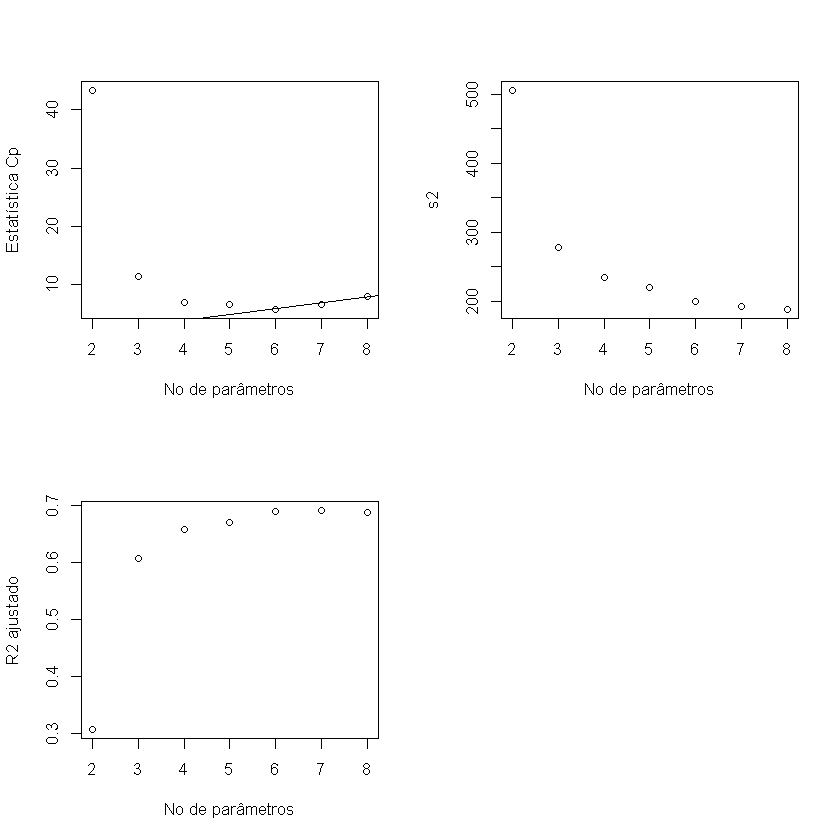

In [10]:
#Determinando CP,R2,S2 e N. de parametros
n_parametros=as.numeric(rownames(rs$which))+1
Cp=rs$cp
R2_ajustado=rs$adjr2
s2=rs$rss


#Gráfico auxiliares
par(mfrow=c(2,2))
plot(n_parametros,Cp,xlab="No de parâmetros",ylab="Estatística Cp")
abline(0,1)
plot(n_parametros,s2,xlab="No de parâmetros",ylab="s2")
plot(n_parametros,R2_ajustado,xlab="No de parâmetros",ylab="R2 ajustado")

In [11]:
n_variaveis = n_parametros-1
cbind(n_variaveis,n_parametros,Cp,R2_ajustado,s2)

n_variaveis,n_parametros,Cp,R2_ajustado,s2
1,2,43.321698,0.3065032,505.4678
2,3,11.464984,0.6066575,278.2626
3,4,6.967298,0.6579297,234.6581
4,5,6.679903,0.6699936,219.3078
5,6,5.767760,0.6893809,199.7651
6,7,6.601195,0.6912624,191.9365
7,8,8.000000,0.6869575,187.9020


A análise da figura do número de parâmetros versus a estatística de $C_p$ indica que o valor de $C_p$ começa a se estabilizar com 5 ou 6 variáveis. A figura do número de parâmetros verusu $s^2$ indica que o valor da variância começa a se estabilizar para um modelo com 6 variáveis regressoras e o gráfico do número de parâmetros versus $R^2_{ajustado}$, indica que o coeficiente de determinação será o máximo para um modelo com 6 variáveis. Portanto de acordo com o **Best subsets Selection**, para um número de variáveis regressoras igual a 6 teremos a seguinte configuração de variáveis regressoras: $X_1,X_2,X_3,X_5,X_6$ e $X_7$. Portanto o modelo é dado por:

In [12]:
ajuste_bss=lm(Y~X1+X2+X3+X5+X6+X7,data=base7)
summary(ajuste_bss)


Call:
lm(formula = Y ~ X1 + X2 + X3 + X5 + X6 + X7, data = base7)

Residuals:
   Min     1Q Median     3Q    Max 
-4.565 -1.603  0.189  1.650  5.793 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 75.77564   23.85795   3.176  0.00353 ** 
X1           0.24308    0.13608   1.786  0.08451 .  
X2           0.40827    0.07164   5.699 3.65e-06 ***
X3           0.15119    0.13902   1.088  0.28574    
X5          11.52262    2.19353   5.253 1.26e-05 ***
X6          -4.59681    2.17157  -2.117  0.04298 *  
X7          -3.62867    1.96952  -1.842  0.07566 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.573 on 29 degrees of freedom
Multiple R-squared:  0.7442,	Adjusted R-squared:  0.6913 
F-statistic: 14.06 on 6 and 29 DF,  p-value: 1.924e-07


O método indica um modelo com 6 variáveis regressoras, no entanto a variável $X_3$ não é considerada significativa para o modelo, into indica que o método não acertou a incluir esta variável no modelo. Em geral os métodos nos auxiliam a escolher as variáveis a fazer parte do modelo, mais não importanta qual o método utilizado, Stepwise ou Best Subsets, nenhum método deverá substituir o bom senso.